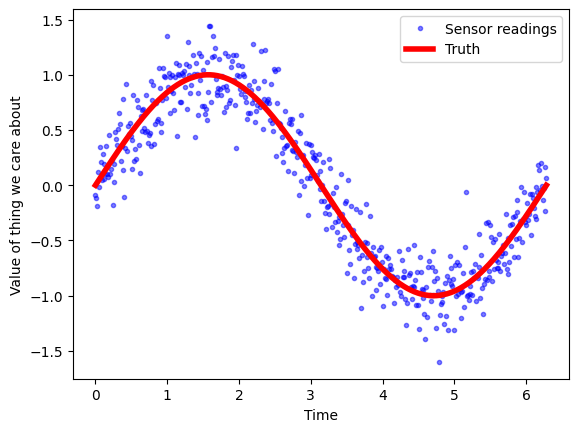

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N_SAMPLES = 500
input_range = np.linspace(0,2*np.pi, N_SAMPLES, dtype=np.float32)
signal = np.sin(input_range)
noise = np.random.normal(loc=0, scale=1, size=N_SAMPLES) # random noise with mu = 0, sigma = 1
assert noise.shape == input_range.shape
noisy_signal = signal + noise/5
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5) 
plt.plot(input_range, signal, 'r-', linewidth=4)
plt.legend(['Sensor readings', 'Truth'])
plt.xlabel('Time')
plt.ylabel('Value of thing we care about')
plt.show() # of course, your plot will vary slightly, depending on the random noise

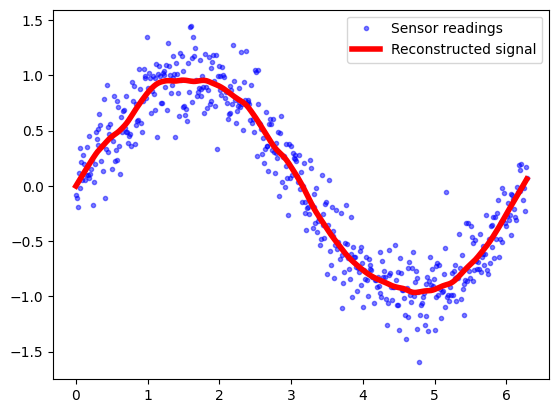

In [2]:
del signal # With a noisy signal, we don't know the truth: we hope to reconstruct it.
from statsmodels.nonparametric.smoothers_lowess import lowess
filtered = lowess(noisy_signal, input_range, frac=0.1)
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5)
plt.plot(filtered[:,0], filtered[:, 1], 'r-', linewidth=4)
plt.legend(['Sensor readings', 'Reconstructed signal'])
plt.show()